<a href="https://colab.research.google.com/github/ElenaMaru/elen/blob/main/website_visit_prophet_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta

dat = pd.read_csv('/content/daily-website-visitors.csv')
dat.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [6]:
data = pd.read_csv('/content/daily-website-visitors.csv', parse_dates = True)

data['ds'] = pd.to_datetime(data['Date'])
data = data.rename(columns={'Page.Loads': 'y'})
data['y'] = data['y'].str.replace(',', '').astype(float)

data = data.drop(['Date', 'Row', 'Day', 'Day.Of.Week', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits'], axis=1)
data.head()


,y,ds
0,2146.0,2014-09-14
1,3621.0,2014-09-15
2,3698.0,2014-09-16
3,3667.0,2014-09-17
4,3316.0,2014-09-18


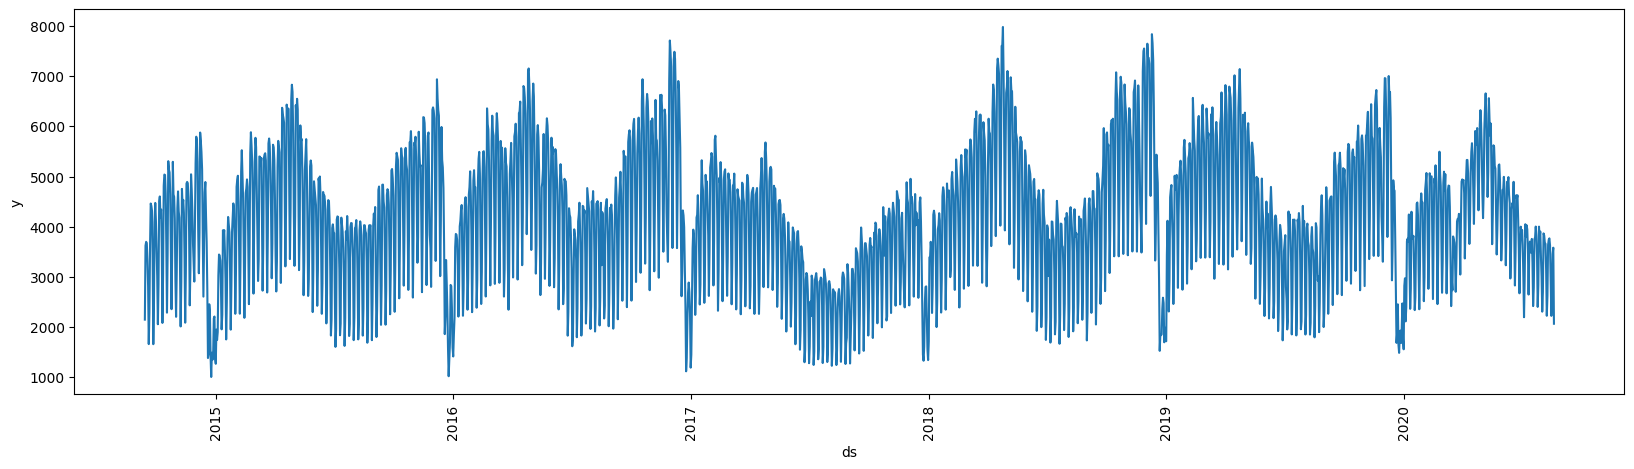

In [7]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=data, x='ds', y='y')
plt.xticks(rotation=90)
plt.show()

In [8]:
train = data[data.ds < (data.ds.max() - timedelta(days=30))].copy()
test = data[data.ds >= (data.ds.max() - timedelta(days=30))].copy()

train.head()

,y,ds
0,2146.0,2014-09-14
1,3621.0,2014-09-15
2,3698.0,2014-09-16
3,3667.0,2014-09-17
4,3316.0,2014-09-18


In [9]:
import prophet
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

prophet.diagnostics.logging.disable(level=50)
fb = prophet.Prophet()

fb.fit(train)

predictions = fb.make_future_dataframe(periods=len(test), freq='D')
forecast = fb.predict(predictions)

forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-14,3321.815056,1406.129433,2616.346542,3321.815056,3321.815056,-1283.358783,-1283.358783,-1283.358783,-872.493065,-872.493065,-872.493065,-410.865718,-410.865718,-410.865718,0.0,0.0,0.0,2038.456273
1,2014-09-15,3324.983907,3086.981438,4317.913831,3324.983907,3324.983907,372.291546,372.291546,372.291546,734.249390,734.249390,734.249390,-361.957844,-361.957844,-361.957844,0.0,0.0,0.0,3697.275453
2,2014-09-16,3328.152759,3254.319622,4456.453265,3328.152759,3328.152759,531.827881,531.827881,531.827881,845.430212,845.430212,845.430212,-313.602331,-313.602331,-313.602331,0.0,0.0,0.0,3859.980640
3,2014-09-17,3331.321610,3282.312090,4484.911098,3331.321610,3331.321610,520.806516,520.806516,520.806516,787.155469,787.155469,787.155469,-266.348952,-266.348952,-266.348952,0.0,0.0,0.0,3852.128127
4,2014-09-18,3334.490462,3012.851140,4282.713894,3334.490462,3334.490462,314.040051,314.040051,314.040051,534.752192,534.752192,534.752192,-220.712142,-220.712142,-220.712142,0.0,0.0,0.0,3648.530512


In [10]:
v_fb_df = test.copy()
v_fb_df = v_fb_df.merge(forecast[['ds', 'yhat']], on='ds', how='left')
v_fb_df.head()

,y,ds,yhat
0,3749.0,2020-07-20,3972.500083
1,3786.0,2020-07-21,4080.418696
2,4002.0,2020-07-22,4016.757792
3,3823.0,2020-07-23,3757.091685
4,3430.0,2020-07-24,2810.845350


In [11]:
np.sqrt(mean_squared_error(v_fb_df['y'], v_fb_df['yhat']))

np.float64(514.2903167848739)

In [12]:
mean_absolute_percentage_error(v_fb_df['y'], v_fb_df['yhat'])

0.13679515661319644

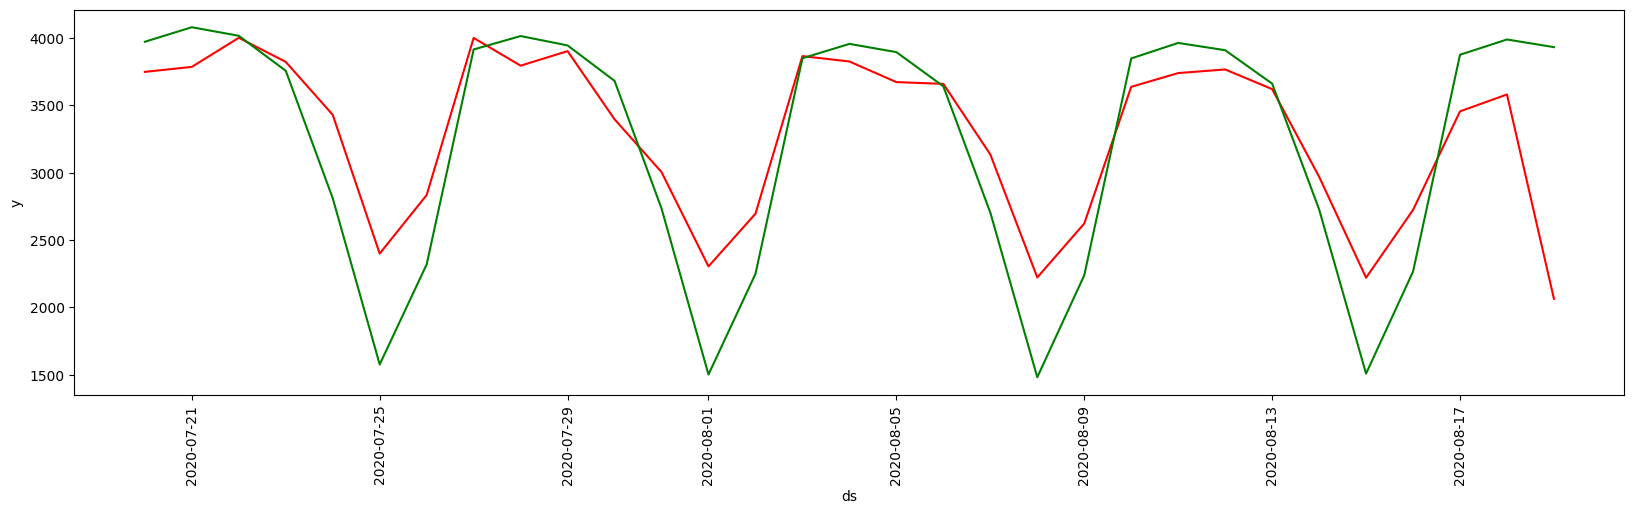

In [13]:
plt.figure(figsize=(20, 5))
sns.lineplot(data=v_fb_df, x='ds', y='y', color = 'red')
sns.lineplot(data=v_fb_df, x='ds', y='yhat', color = 'green')
plt.xticks(rotation=90)
plt.show()